# Chap 7. Machine learning tips

## 1. Learning reate

- 아래와 같은 Gradient descent algorithm의 수식에서 alpha 값이 learning rate 이다.

\begin{equation*}
W := W - \alpha \frac{\partial}{\partial W}cost(W)
\end{equation*}

- Learining rate은 아래와 같은 convex curve에서 임의의 W 점에서 다음 스텝의 W를 찾을때 스텝의 크기를 의미한다.

<img src="https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_learning_rate.png" alt="" title="" />

### 1.1. Large learning rate
- Learning rate가 너무 크면 Convex curve에서 상단 왼쪽의 그림과 같이 W가 밖으로 튕겨나가는 overshooting이 발생한다.
- 이경우 cost를 출력하면 숫자가 아닌 값이(nan) 출력될 것이다. 

### 1.2. Small learning rate
- Larning rate가 너무 작으면 Convex curve에서 상단 오른쪽의 그림과 같이 W가 global minimum(optimum)을 찾지 못하고 local minimum에서 학습을 종료할수 있다.

### 1.3. Try several learning rate
- Observe the cost function
- Check it goes down in a reasonalble rate
- 0.1 ~ 0.001 값을 시작으로 적당한 값을 찾아야 한다.


## 2. Data (X) preprocessing
- Feature data X의 어떤 데이터가 너무 크거나 너무 작으면 learning rate가 적당하다고 판단되어도 cost 함수가 overshooting 하거나, 학습이 정확하게 일어나지 않을수 있다. 이런 경우 X 데이터를 선처리할 필요가 있다.

<img src="http://cs231n.github.io/assets/nn2/prepro1.jpeg" alt="" title="" />


### 2.1. Standardization
- 표준정규분포표준화라고 하며 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값으로 2개 이상의 대상이 단위가 다를때 대상 데이터를 같은 기준으로 보게한다. 표준화를 적용하면 간극이 줄이는 결과를 얻을수 있다.

- 아래 식과 같이 요소값 x를 x값들의 평균값(mu)으로 뺀후 x값들의 표준편차(sigma)로 나눠준다.

\begin{equation*}
x'_j=\frac{x_j - \mu_j}{\sigma_j}
\end{equation*}

- python으로 구현하면 아래와 같다.
  - X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()


### 2.2. Normalization
- 정규화는 요소의 전체를 0~100으로 설정한다는 것을 의미한다.

- 아래 식과 같이 요소값 x를 x값들의 최소값에서 뺀후 x값들의 최대값과 최소값을 뺀 값으로 나눈다.

\begin{equation*}
x'_j=\frac{x_j - x_{min}}{x_{max} - x_{min}}
\end{equation*}

- python으로 구현하면 아래와 같다.
  - X_nor[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))

## 3. Overfitting

<img src="https://i.ytimg.com/vi/dBLZg-RqoLg/maxresdefault.jpg" alt="" title="" />

- Our model is very good with training data set (with memorization)
- Not good at test dataset or in real use
- 학습 데이터에 너무 잘 맞게 학습이 되어 테스트 데이터로 테스트시 예측을 못하는 경우를 overfitting 이라고 한다.

### 3.1. Solutions for overfitting
- More training data!! 
- Reduce the number of features
- Regularization

### 3.2. Regularization
- Let's not have too big numbers in the weight
- 일반화라고 하며 아래 cost 함수 끝에 lambda로 시작하는 텀을 추가로 더한 것이다.
- 각 W 엘리먼트에 대해 제곱한 값을 모두 더한후 lambda라는 regularization strengh라는 상수를 곱하여 cost 함수에 더하게 된다.

\begin{equation*}
loss =\frac{1}{m}\sum_{i}^{m}D(S(WX_i + b), L_i) + \lambda \sum_ \text{ } W^2
\end{equation*}

- Regulaization을 tensorflow로 구현하면 아래와 같다.
  - reg_strength = 0.001
  - l2reg = reg_strength * tf.reduce_sum(tf.square(W))
  - cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
    labels=Y_one_hot)
  - cost = tf.reduce_mean(cost_i) + l2reg

## 4. Lab1: Tensor Manipulation

In [1]:
import tensorflow as tf
import numpy as np
import pprint

tf.set_random_seed(777)  # for reproducibility

pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()
#sess.close()

### 4.1. Array and Slicing

In [2]:
# Array and slicing
t = np.array([[0., 1.], [2., 3.], [4., 5.], [6., 7.]])

pp.pprint(t)
print("t.ndim =", t.ndim) # rank
print("t.shape =", t.shape) # shape
print("t[0], t[1], t[-1] =", t[0], t[1], t[-1])
print("t[:3] =", t[:3])
print("t[1:-1] =", t[1:-1])

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.]])
t.ndim = 2
t.shape = (4, 2)
t[0], t[1], t[-1] = [0. 1.] [2. 3.] [6. 7.]
t[:3] = [[0. 1.]
 [2. 3.]
 [4. 5.]]
t[1:-1] = [[2. 3.]
 [4. 5.]]


### 4.2. Shape, Rank, Axis
- Rank : [ 의 개수이다.
- Shape : [?1, ?2, ?3]로 나타내며, ?3은 가장 안쪽의 [ ] 안에 있는 엘리먼트의 개수 ?2는 [[ ]] 안에 있는 엘리먼트의 개수, ?3은 [[[ ]]]안에 있는 엘리먼트의 개수이다. ?의 개수는 rank의 수와 같다.
- Axis는 rank의 수와 같은만큼 존재하는데 가장 바깥쪽의 [가 axis 0이며 안쪽으로 들어갈수록 1씩 증가한다.
- 가장 안쪽의 axis는 -1로 표기하는데 가장 많이 사용한다.

In [3]:
# Rank(count of brackets) = 1, element = 4, Shape = [4]
t = tf.constant([1, 2, 3, 4])
tf.shape(t).eval()

array([4], dtype=int32)

In [4]:
# Rank = 2, Shape = [2, 4]
t = tf.constant([[1, 2, 3, 4],
                 [5, 6, 7, 8]])
tf.shape(t).eval()

array([2, 4], dtype=int32)

In [5]:
# Rank = 4, Shape = [1, 2, 3, 4]
t = tf.constant([[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
                  [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]])
tf.shape(t).eval()

array([1, 2, 3, 4], dtype=int32)

In [ ]:
[ # axis = 0 (1st brakets)
    [ # axis = 1 (2nd brackets)
        [ # axis = 2 (3th brackets)
            [1,2,3,4],  # axis = 3 or -1 (4th brackets)
            [5,6,7,8],
            [9,10,11,12]
        ],
        [
            [13,14,15,16],
            [17,18,19,20], 
            [21,22,23,24]
        ]
    ]
]

### 4.3. Matmul vs Multiply
- [x,y][y,z]  = [x,z]
- 두 행렬의 shpae을 확인한다.
- 행렬의 곱셈이 일어나려면 y 값이 같이야 하며, 행렬의 곱셈이 완료되면 [x,z]의 shape이 된다.
- 행렬의 곱셈은 tf.matmul 함수를 사용한다.

In [6]:
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[1.], [2.]])
print("Metrix 1 shape =", matrix1.shape)
print("Metrix 2 shape =", matrix2.shape)
tf.matmul(matrix1, matrix2).eval()

Metrix 1 shape = (2, 2)
Metrix 2 shape = (2, 1)


array([[ 5.],
       [11.]], dtype=float32)

In [7]:
# Warning: martix multiplication vs general multiplication
(matrix1 * matrix2).eval() # See below broadcasting

array([[1., 2.],
       [6., 8.]], dtype=float32)

### 4.4. Watch out broadcasting
- Shape이 맞지 않는 경우 수학적으로 연산이 안되는데, tensorflow에서는 broadcasting을 시켜 shape을 연산이 되도록 맞춰준다.

In [8]:
# Same shape
matrix1 = tf.constant([[3., 3.]]) # Rank = 2, Shape = [1, 2]
matrix2 = tf.constant([[2., 2.]]) # Rank = 2, Shape = [1, 2]
(matrix1 + matrix2).eval() # Rank = 2, Shape = [1, 2]

array([[5., 5.]], dtype=float32)

In [9]:
# Different shape case 1
matrix1 = tf.constant([[1., 2.]]) # Rank = 2, Shape = [1, 2]
matrix2 = tf.constant([3.]) # Rank = 1, Shape = [1]
# Broadcasting output = [[3., 3.]]
(matrix1 + matrix2).eval() # Rank = 2, Shape [1, 2]

array([[4., 5.]], dtype=float32)

In [10]:
# Different shape case 2
matrix1 = tf.constant([[1., 2.]]) # Rank = 2, Shape = [1, 2]
            # Broadcasting output = [1., 2.]
matrix2 = tf.constant([3., 4.]) # Rank = 1, Shape = [2]
            # Broadcasting output = [3., 4.]
(matrix1 + matrix2).eval() # Rank = 2, Shape = [1, 2]

array([[4., 6.]], dtype=float32)

In [11]:
# Different shape case 3
matrix1 = tf.constant([[1., 2.]]) # Rank = 2, Shape = [1, 2]
# Broadcasting output = [1., 2.], 
#                       [1., 2.]]
matrix2 = tf.constant([[3.], [4.]]) # Rank = 2, Shape = [2, 1]
# Broadcasting output = [[3., 3.], 
#                        [4., 4.]]
(matrix1 + matrix2).eval() # Rank = 2, Shape = 2

array([[4., 5.],
       [5., 6.]], dtype=float32)

### 4.5. Reduce Mean and Reduce Sum
- reduce_mean은 axis값에 따라 행렬의 평균을 계산하는 함수이다.
- redume_sum은 axis값에 따라 행렬의 합을 계산하는 함수이다.

In [12]:
# case 1
tf.reduce_mean([1, 2], axis = 0).eval()

1

In [13]:
# case 2
tf.reduce_mean([1., 2.], axis = 0).eval()

1.5

In [14]:
# case 3
x = [[1., 2.],
     [3., 4.]]
tf.reduce_mean(x, axis = 0).eval() # (1+3)/2, (2+4)/2

array([2., 3.], dtype=float32)

In [15]:
# case 4
x = [[1., 2.],
     [3., 4.]]
tf.reduce_mean(x, axis = 1).eval() # (1+2)/2, (3+4)/2

array([1.5, 3.5], dtype=float32)

In [16]:
# case 5
x = [[1., 2.],
     [3., 4.]]
tf.reduce_mean(x, axis = -1).eval() # same case 4 (max axis)

array([1.5, 3.5], dtype=float32)

In [17]:
# case 6
x = [[1., 2.],
     [3., 4.]]
tf.reduce_mean(x).eval() # ( ((1+2)/2) + (3+4)/2 ) / 2

2.5

In [18]:
# case 7
x = [[1., 2.],
     [3., 4.]]
tf.reduce_sum(x, axis = 0).eval() # (1+3), (2+4)

array([4., 6.], dtype=float32)

In [19]:
# case 8
x = [[1., 2.],
     [3., 4.]]
tf.reduce_sum(x, axis = -1).eval() # (1+2), (3+4)

array([3., 7.], dtype=float32)

In [20]:
# case 9
x = [[1., 2.],
     [3., 4.]]
tf.reduce_sum(x).eval() # (1+2) + (3 + 4)

10.0

In [21]:
# case 10
x = [[1., 2.],
     [3., 4.]]
tf.reduce_mean(tf.reduce_sum(x, axis = -1)).eval() # case 8 / 2

5.0

### 4.6. Argmax
- axis에 따라 행렬에서 가장 큰수에 해당하는 index 값을 찾아주는 함수이다.

In [22]:
# case 1
x = [[0, 1, 2],
     [2, 1, 0]]
tf.argmax(x, axis = 0).eval() # return array index, not return value

array([1, 0, 0])

In [23]:
# case 2
x = [[0, 1, 2],
     [2, 1, 0]]
tf.argmax(x, axis = 1).eval()

array([2, 0])

In [24]:
# case 3
x = [[0, 1, 2],
     [2, 1, 0]]
tf.argmax(x, axis = -1).eval() # same axis 1

array([2, 0])

### 4.7. Reshape
- 일반적으로 machine learning에서 traning data는 수정을 하지 않으므로, 가장 안쪽의 엘리먼트는 수정을 하지 않는것이 일반적이다.

In [25]:
# Origin
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
t.shape

(2, 2, 3)

In [26]:
# Reshape 1
tf.reshape(t, shape=[-1, 3]).eval() # Do not reshape last element

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [27]:
# Reshape 2
tf.reshape(t, shape=[-1, 1, 3]).eval()

array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])

In [28]:
# Reshape 3
tf.reshape(t, shape=[-1, 2, 3]).eval() # same shape[2, 2, 3]

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

### 4.8. Reshape (Squeeze and Expand)
- squeeze는 다차원의 행렬을 1차원으로 변경해준다.
- expand_dims는 주어진 행렬의 차원을 다차원의 행렬로 변경해준다.

In [29]:
# Squeeze
tf.squeeze([[0], [1], [2]]).eval()

array([0, 1, 2], dtype=int32)

In [30]:
# Expand 1
tf.expand_dims([0, 1, 2], 0).eval()

array([[0, 1, 2]], dtype=int32)

In [31]:
# Expand 2
tf.expand_dims([0, 1, 2], 1).eval()

array([[0],
       [1],
       [2]], dtype=int32)

### 4.9. One hot
- one_hot은 각 엘리먼트의 수에 해당하는 자리만 hot하게 1로 만들어 준다. depth는 엘리먼트의 종류의 수이다. 그래야 자리로 구분할수 있기 때문이다.
- case 1에서 엘리먼트는 0, 1, 2, 3 즉 4종류의 수로 이루어진 행렬이므로 depth는 4가 되며, 0에 해당하는 byte masking은 [[1.0, 0, 0, 0]]이 된다.
- one_hot 함수의 결과는 항상 1차원이 늘어나기 때문에 필요시 reshape을 사용해야 한다.

In [32]:
# case 1
tf.one_hot([[0], [1], [2], [3]], depth=4).eval()

array([[[1., 0., 0., 0.]],

       [[0., 1., 0., 0.]],

       [[0., 0., 1., 0.]],

       [[0., 0., 0., 1.]]], dtype=float32)

In [33]:
# case 2
t = tf.one_hot([[0], [3], [1], [2]], depth=4).eval()
tf.reshape(t, shape=[-1, 4]).eval()

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

### 4.10. Casting

In [34]:
# case 1
tf.cast([1.1, 2.2, 3.3, 4.9], tf.int32).eval()

array([1, 2, 3, 4], dtype=int32)

In [35]:
# case 2
tf.cast([True, False, 1 == 1, 0 == 1], tf.int32).eval()

array([1, 0, 1, 0], dtype=int32)

### 4.11. Stack
- axis에 따라 행렬을 쌓을수 있게 해주는 함수이다.

In [36]:
# case 1
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
tf.stack([x, y, z]).eval()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [37]:
# case 2
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
tf.stack([x, y, z], axis = 0).eval()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [38]:
# case 3
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
tf.stack([x, y, z], axis = 1).eval()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]], dtype=int32)

In [39]:
# case 4
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
tf.stack([x, y, z], axis = -1).eval()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]], dtype=int32)

### 4.12. Ones and Zeros like
- 주어진 행렬(tensor)의 모든 엘리먼트를 0또는 1로 채울수 있다.

In [40]:
# case 1
x = [[0, 1, 2],
     [2, 1, 0]]
tf.ones_like(x).eval()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [41]:
# case 2
x = [[0, 1, 2],
     [2, 1, 0]]
tf.zeros_like(x).eval()

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

### 4.13. Zip
- 두대 이상의 행렬에서 엘리먼트를 순서에 대로 묶에서 리턴해줄때 사용하는 함수이다.
- 일반적으로 for loop에서 많이 사용한다.

<img src="http://blog.londasfiles.com/wp-content/uploads/2017/10/zipper.jpg" width="200" />

In [42]:
# case 1
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print("x =", x, "\ty =", y)

x = 1 	y = 4
x = 2 	y = 5
x = 3 	y = 6


In [43]:
# case 2
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print("x =", x, "\ty =", y, "\tz =", z)

x = 1 	y = 4 	z = 7
x = 2 	y = 5 	z = 8
x = 3 	y = 6 	z = 9


## 5. Lab2: Learning rate and evaluation

In [10]:
################################################################################
# lab7-1 : Learning rate and evalutation
#          
################################################################################

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# for reproducibility
tf.set_random_seed(777) 

# Predicting animal type based on various features
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]

y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]


x = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax cmputes softmax activatins
# softmax = exp(logits) / reduce_mean(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(x, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
#    learning_rate = 1e-10).minimize(cost)   # case1 1e-10
#    learning_rate = 10.0).minimize(cost)   # case2 10.0
    learning_rate = 0.1).minimize(cost)   # case3 0.1

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(1001):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={x: x_data, y: y_data})
        if step % 500 == 0:
            print(step, cost_val, W_val)

    # Pridict
    print("Prediction: ", sess.run(prediction, feed_dict={x: x_test}))

    # Calcuate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={x: x_test, y: y_test}))

0 5.6709914 [[ 0.87485987  1.5441668  -0.2560822 ]
 [ 0.75910157  0.58953494 -0.02900083]
 [ 0.1535153   0.86252123 -0.5329474 ]]
500 0.46780825 [[-1.3670235   1.0338025   2.4961648 ]
 [ 0.59331566  0.4376106   0.28871036]
 [ 0.9197705   0.3353759  -0.7720563 ]]
1000 0.3669179 [[-2.5297198   1.2339215   3.4587445 ]
 [ 0.58751327  0.46741167  0.26471278]
 [ 1.3657718   0.26661664 -1.1492964 ]]
Prediction:  [2 2 2]
Accuracy:  1.0


- learning_rate = 1e-10).minimize(cost) 일 경우의 결과는 아래와 같다.
  - Prediction:  [1 1 1]
  - Accuracy:  0.0
- learning_rate = 10.0).minimize(cost) 일 경우의 결과는 아래와 같다.
  - Prediction:  [0 0 0]
  - Accuracy:  0.0
- learning_rate = 0.1).minimize(cost) 일 경우의 결과는 아래와 같이 정상적인 학습이 일어난다.
  - Prediction:  [2 2 2]
  - Accuracy:  1.0
  
  
## 6. Lab3: Data preprocessing (without minmax scale)
- x data에 굉장히 큰값이 포함되었고, 이에대한 전처리 함수 MinMaxScaler를 호출하지 않았을 경우의 예를 보여준다.

In [13]:
################################################################################
# lab7-2 : Linear regression without min max sclae
#          
################################################################################

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# for reproducibility
tf.set_random_seed(777) 

# MinMaxScaler function
'''
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # Noiser term prevents the zero division
    return numerator / (denominator + 1e-7)
'''

# Traning data
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
    
# Very important, it does not work without it.
'''
xy = MinMaxScaler(xy)
print(xy)
'''

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Placeholders for tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1], name='weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 2000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  1125396600000.0 
Prediction:
 [[ -747507.7 ]
 [-1505578.2 ]
 [-1184227.  ]
 [ -829917.75]
 [ -978230.9 ]
 [ -986472.44]
 [ -904079.8 ]
 [-1151281.1 ]]
2000 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


- cost 값이 nan이 되어, convex curve 외부로 W가 튕긴것을 알수 있다. 그래서 예측 또한 이루어지지 않았다.


## 7. Lab4: Data preprocessing (with minmax scale)
- x data에 굉장히 큰값이 포함되었고, 이에대한 전처리 함수 MinMaxScaler를 호출하였을 경우의 예를 보여준다.

In [20]:
################################################################################
# lab7-3 : Linear regression with min max sclae
#          
################################################################################

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# for reproducibility
tf.set_random_seed(777) 

# MinMaxScaler function
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # Noiser term prevents the zero division
    return numerator / (denominator + 1e-7)

# Traning data
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
    
# Very important, it dones not work without it.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Placeholders for tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1], name='weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 2000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  0.11489186 
Prediction:
 [[ 1.5295815 ]
 [ 1.3669645 ]
 [ 0.962455  ]
 [ 0.4370768 ]
 [ 0.8395956 ]
 [ 0.77908486]
 [ 0.11631776]
 [-0.09806752]]
2000 Cost:  0.10301289 
Prediction:
 [[ 1.5001452 ]
 [ 1.3393453 ]
 [ 0.93978035]
 [ 0.419984  ]
 [ 0.81888986]
 [ 0.7591939 ]
 [ 0.10408911]
 [-0.1098053 ]]


- cost 값이 0에 수렴하며 예측이 잘되고 있음을 확인할 수 있다.


## 8. Lab5: MNIST introduction
- MNIST dataset은 0~9의 숫자를 사람의 손으로 쓴 데이터로서 training set과 test set으로 구성되어 있다. 

- http://yann.lecun.com/exdb/mnist/ 에서 데이터를 받을수 있다.

- tensorflow에는 input_data.py 파일에서 MNIST 파일을 웹에서 다운로드하여 처리하고 있다.

- 한개의 숫자는 28 x 28 x 1(256 gray color) = 784 byte 크기의 행렬 데이터이다.

- nb_classes는 0~9의 숫자이므로 10이 된다.

- epoch 은 전체 데이터를 학습했을 때 1 epoch 이라 한다.

- batch size 는 전체 데이터가 너무 방대할때 한번에 몇개의 데이터를 읽을 것인지를 나타내는 수이다.

- iteration 은 전체 데이터에서 batch size를 나눈 값이다.

- 만약 전체 데이터가 1000, epoch이 10, batch_size가 500이라고 가정하면, iterations은 2가 된다. 정리하면 한번 학습에 500개의 데이터를 가지고 2회 반복 학습하여 1epoch의 학습 완료하고, epochs가 10회 였으므로 전체 데이터를 10번을 반복 학습한다는 의미이다.

- 아래 예제에서 num_examples은 55,000, epoch이 15, batch size가 100이므로 iteration에 해당하는 total_batch는 55,000/100 = 550이 된다.
  - 안쪽 반복문은 100개의 데이터를 550번 읽어서 전체 데이터를 1회(epoch) 학습한다.
  - 바깥쪽 반복문은 15회(epochs) 학습한다.

- accuracy.eval(session=sess, ...) 소스코드는 세션을 실행시키는 또다른 방법이다. 이전에는  sess.run()을 사용하였으나, tensor 이름에 .eval()을 붙여서 사용할수 있다.

- 학습 완료후 예측하는 부분의 소스코드가 있는데 이것은 전체 test 데이터의 갯수 중에서 하나를 난수로 선택해서 image와 label을 1개만 가져온다. [r:r+1]은 r에서부터 r+1 이전까지의 범위를 나타낸다는 의미인데 결국 r번째의 image와 label 하나를 가르키게 된다. 그리고 나서 matplotlib 라이브러리를 통하여 r번째 이미지와 Label 그리고 예측값을 출력한다.

Extracting ../../mnist_data/train-images-idx3-ubyte.gz
Extracting ../../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../mnist_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 	Cost =  3.069530771
Epoch: 0002 	Cost =  1.117204865
Epoch: 0003 	Cost =  0.885250891
Epoch: 0004 	Cost =  0.772756116
Epoch: 0005 	Cost =  0.701217290
Epoch: 0006 	Cost =  0.650942425
Epoch: 0007 	Cost =  0.613162382
Epoch: 0008 	Cost =  0.583311871
Epoch: 0009 	Cost =  0.558597704
Epoch: 0010 	Cost =  0.538168136
Epoch: 0011 	Cost =  0.520633296
Epoch: 0012 	Cost =  0.505402260
Epoch: 0013 	Cost =  0.491845261
Epoch: 0014 	Cost =  0.480359333
Epoch: 0015 	Cost =  0.469307867
Learning finished...
------------------------------------------------------------------
Accuracy: 0.8874
------------------------------------------------------------------
Label: [3]
Prediction: [3]


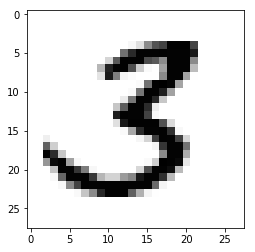

In [25]:
################################################################################
# lab7-4 : minist introduction
#          
################################################################################

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# for reproducibility
tf.set_random_seed(777) 

# Import MNIST data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../mnist_data/", one_hot=True)

nb_classes = 10 # 0 ~ 9

# MNIST data image of shape 28 * 28 = 784 pixel
X = tf.placeholder(tf.float32, shape=[None, 784])
# 0 ~ 9 digits recognition = 10 classed
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis using softmax
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Parameters
training_epochs = 15
batch_size = 100

# Graph
with tf.Session() as sess:
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0;
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print("Epoch:", "%04d" % (epoch + 1),
              "\tCost = ", "{:.9f}".format(avg_cost))

    print("Learning finished...")

    # Test the model using test data sets
    print("------------------------------------------------------------------")
    print("Accuracy:", accuracy.eval(session=sess, feed_dict={
            X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("------------------------------------------------------------------")
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction:", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    # Show image
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

- 각 epoch에 따라 cost가 0에 수렴하는 것을 확인할 수 있다.
- 매우 간단한 모델임에도 정확도가 88%가 되는 것을 알수 있다.
- 최종적으로 test image를 랜덤하게 하나 골라서 예측을 해본결과 3이라고 정확하게 예측한것을 확인할수 있다.